In [1]:
import os
import numpy as np

In [2]:
au2eV = 27.2114079527
db_name = "heptane"
energy_qm = np.load(f"{db_name}_evaluate_answer.npy", allow_pickle=True)
energy_nnp = np.load(f"{db_name}_evaluate_prediction.npy", allow_pickle=True)

energy_qm *= au2eV
energy_nnp *= au2eV

(100, 3)
(100, 3)
[[-7508.37218043 -7499.6967172  -7499.29063876]
 [-7507.59074931 -7498.56318535 -7498.17952841]
 [-7507.53178904 -7498.14714179 -7497.7776021 ]
 [-7507.43130747 -7498.76913106 -7498.25675806]
 [-7507.25774838 -7498.54740725 -7498.20194992]
 [-7508.08402251 -7499.13617947 -7498.73425316]
 [-7508.33481125 -7498.87127349 -7498.741727  ]
 [-7509.2250282  -7499.47665424 -7499.33049922]
 [-7509.14530728 -7499.86695459 -7499.73823852]
 [-7508.41121046 -7499.64938291 -7499.513193  ]]
[[-7508.47930542 -7499.60370946 -7499.45174146]
 [-7507.56085396 -7498.29994022 -7498.01842572]
 [-7507.47199835 -7498.27502743 -7497.85566217]
 [-7507.50936753 -7498.51502062 -7498.38215242]
 [-7507.35906038 -7498.45356908 -7498.37633944]
 [-7508.10146146 -7499.19015718 -7498.72844018]
 [-7508.42615813 -7499.01493724 -7498.89867756]
 [-7509.22087607 -7499.4658587  -7499.32385581]
 [-7509.28980145 -7500.1044565  -7499.75567747]
 [-7508.54573952 -7499.75567747 -7499.15860098]]


R2:0.999
R2:0.782
R2:0.925


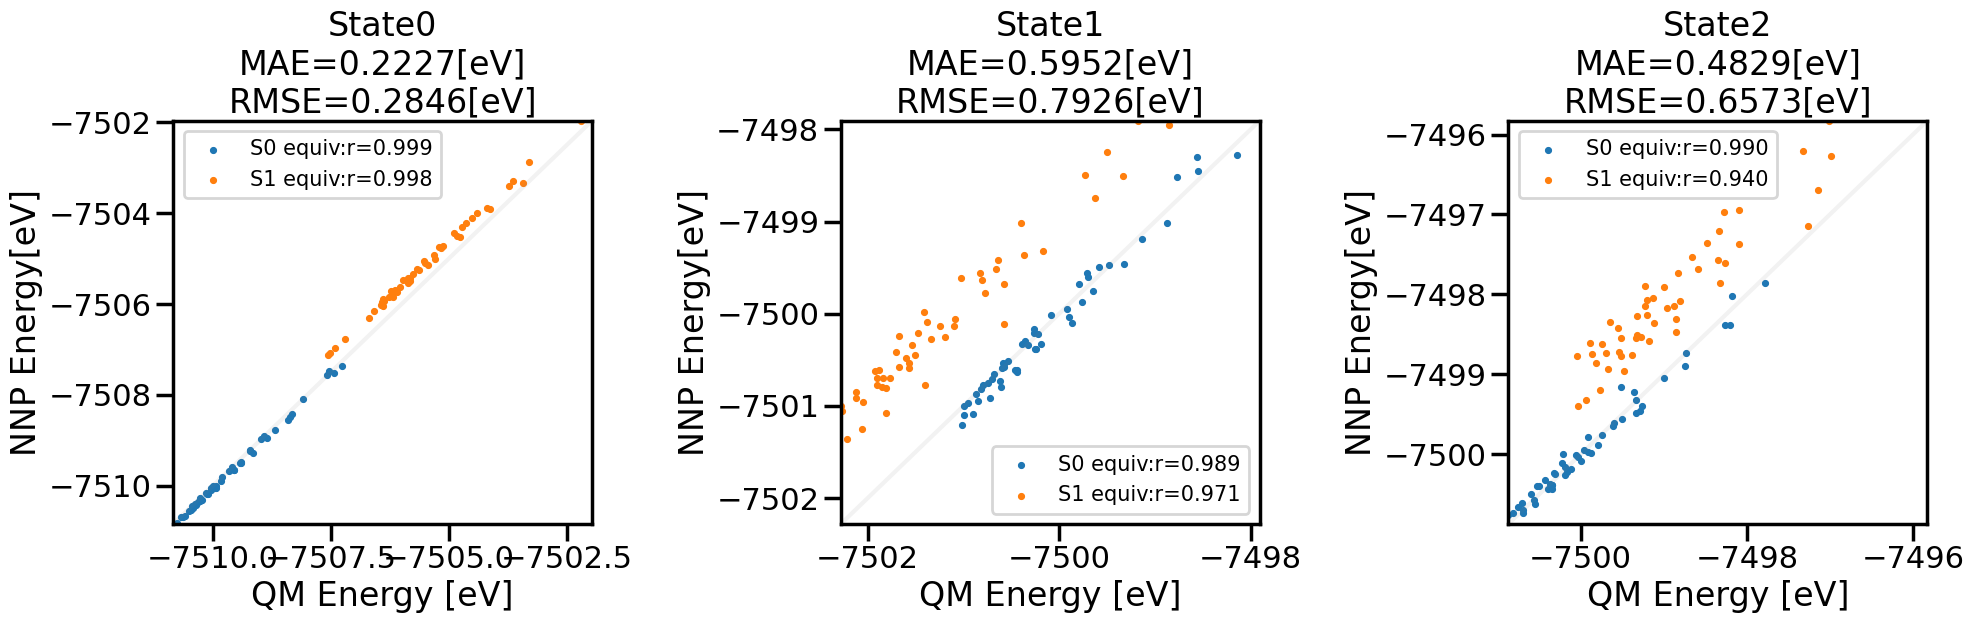

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

import seaborn as sns

sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8

au2eV = 27.2114079527

ncol = 3
nrow = 1
fig, axes = plt.subplots(figsize=(6.75 * ncol, 6.75 * nrow), ncols=ncol, nrows=nrow)

nstate = 3
num_atom = 23
for i in range(nstate):
    ax = axes[i]
    r2, p = pearsonr(energy_qm[:, i][:50], energy_nnp[:, i][:50])
    label = f"S0 equiv:r={r2:.3f}"
    ax.scatter(energy_qm[:, i][:50], energy_nnp[:, i][:50], s=10, label=label)
    r2, p = pearsonr(energy_qm[:, i][50:], energy_nnp[:, i][50:])
    label = f"S1 equiv:r={r2:.3f}"
    # total
    r2, p = pearsonr(energy_qm[:, i], energy_nnp[:, i])
    print(f"R2:{r2:.3f}")
    ax.scatter(energy_qm[:, i][50:], energy_nnp[:, i][50:], s=10, label=label)
    energy_mae = mean_absolute_error(energy_qm[:, i], energy_nnp[:, i])
    energy_rmse = mean_squared_error(energy_qm[:, i], energy_nnp[:, i], squared=False)
    ax.set_title(f"State{i}\nMAE={energy_mae:.4f}[eV]\nRMSE={energy_rmse:.4f}[eV]")
    ax.legend(fontsize=15)

for i in range(nstate):
    ax = axes[i]
    min_e = min([min(energy_qm[:, i]), min(energy_nnp[:, i])])
    max_e = max([max(energy_qm[:, i]), max(energy_nnp[:, i])])
    ax.set_xlim(min_e, max_e)
    ax.set_ylim(min_e, max_e)
    # print(min_e, max_e)
    x = np.linspace(min_e, max_e, 1000)
    ax.plot(x, x, linestyle="solid", color="gray", alpha=0.1)
    ax.set_xlabel("QM Energy [eV]")
    ax.set_ylabel("NNP Energy[eV]")

plt.tight_layout()
plt.show()

R2:0.999
R2:0.993


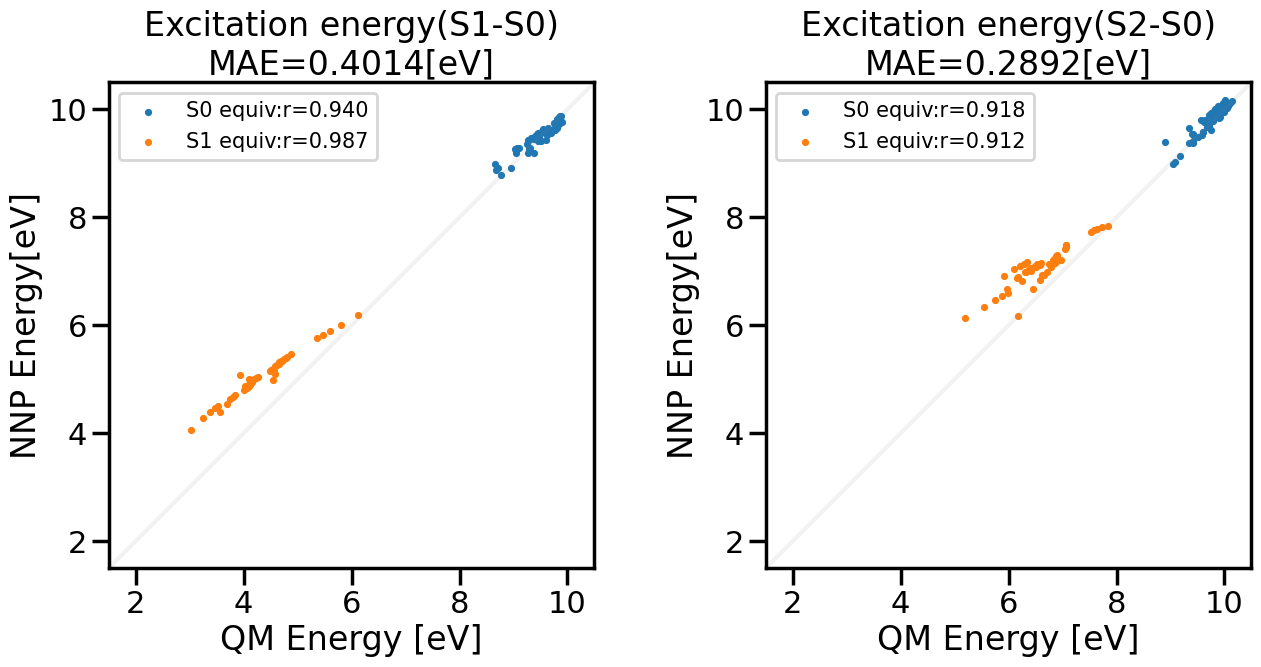

In [5]:
sns.set_context("poster")
plt.rcParams["grid.linewidth"] = 0.8

au2eV = 27.2114079527

ncol = 2
nrow = 1
fig, axes = plt.subplots(figsize=(6.75 * ncol, 6.75 * nrow), ncols=ncol, nrows=nrow)

nstate = 2
num_atom = 23
for i in range(nstate):
    ax = axes[i]
    diff_qm = energy_qm[:, i + 1] - energy_qm[:, 0]
    diff_nnp = energy_nnp[:, i + 1] - energy_nnp[:, 0]
    r2, p = pearsonr(diff_qm[:50], diff_nnp[:50])
    label = f"S0 equiv:r={r2:.3f}"
    ax.scatter(diff_qm[:50], diff_nnp[:50], s=10, label=label)
    r2, p = pearsonr(diff_qm[50:], diff_nnp[50:])
    label = f"S1 equiv:r={r2:.3f}"
    ax.scatter(diff_qm[50:], diff_nnp[50:], s=10, label=label)
    # total
    r2, p = pearsonr(diff_qm, diff_nnp)
    print(f"R2:{r2:.3f}")

    energy_mae = mean_absolute_error(diff_qm, diff_nnp)
    energy_rmse = mean_squared_error(diff_qm, diff_nnp, squared=False)
    ax.set_title(f"Excitation energy(S{i+1}-S{0})\nMAE={energy_mae:.4f}[eV]")
    ax.legend(fontsize=15)
    min_e = 1.5
    max_e = 10.5
    x = np.linspace(min_e, max_e, 1000)
    ax.set_xlim(min_e, max_e)
    ax.set_ylim(min_e, max_e)
    ax.plot(x, x, linestyle="solid", color="gray", alpha=0.1)
    ax.set_xlabel("QM Energy [eV]")
    ax.set_ylabel("NNP Energy[eV]")
    ax.set_xticks([2, 4, 6, 8, 10])
    ax.set_yticks([2, 4, 6, 8, 10])
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()